In [61]:
#Bibliotecas Utilizadas
from math import  *
import matplotlib.pyplot as plt
import numpy as np

In [62]:
#Definição dos Parâmetros
L_aleta = 0.2
h = 20
r = 0.12
k_al = 240
T_amb = 25 + 273
T_base = 100 +273
A_secao_transversal = pi*(r**2)
P = 2*pi*r


In [63]:
#Funções
def temperatura_aleta_ponto_convecao(P,area_transversal,L,x,h,k,T_base,T_ambiente):
    m =((h*P)/(k*area_transversal))**0.5
    razao = (cosh(m*(L-x))+(h/(m*k))*sinh(m*(L-x)))/(cosh(m*L)+(h/(m*k))*sinh(m*L))
    teta_b = T_base-T_ambiente
    return razao*teta_b +T_ambiente


def taxa_qa_convecao(P,area_transversal,L,h,k,T_base,T_ambiente):
    m =((h*P)/(k*area_transversal))**0.5
    teta_b = T_base-T_ambiente
    M= teta_b*((h*P*k*area_transversal)**0.5)
    taxa = M*(sinh(m*L)+(h/(m*k))*cosh(m*L))/(cosh(m*L)+(h/(m*k))*sinh(m*L))
    return taxa

def taxa_qa_infinito(P,area_transversal,h,k,T_base,T_ambiente):
    teta_b = T_base-T_ambiente
    M= teta_b*((h*P*k*area_transversal)**0.5)
    return M

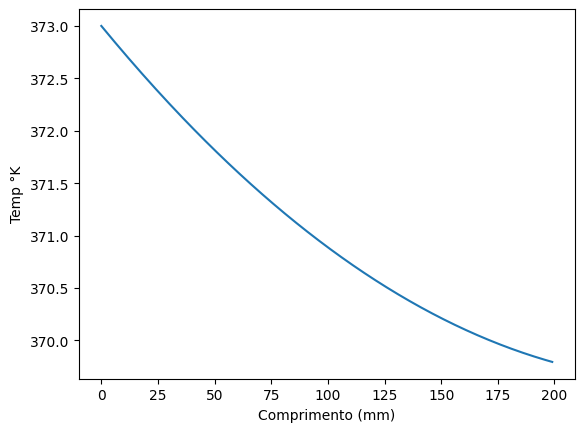

In [64]:
#a)
lista_temperaturas = []
lista_intervalo = np.arange(0, 0.2, 0.001)

for i in lista_intervalo:
    lista_temperaturas.append(temperatura_aleta_ponto_convecao(P,A_secao_transversal,L_aleta,i,h,k_al,T_base,T_amb))



plt.plot(lista_intervalo*1000,lista_temperaturas)
plt.xlabel("Comprimento (mm)")
plt.ylabel("Temp °K")
plt.show()


In [65]:
#b)
qa = taxa_qa_convecao(P,A_secao_transversal,L_aleta,h,k_al,T_base,T_amb)
print("A taxa de transferência de calor é: {:.2f}".format(qa))

A taxa de transferência de calor é: 285.29


In [66]:
#c)
A_superficie_aleta = A_secao_transversal+ 2*(pi*r*L_aleta)
q_superficie = qa/(h*A_superficie_aleta*T_base)
print("A eficiência é de {:.2f}".format(q_superficie))

A eficiência é de 0.20


In [67]:
#d)
e = qa/(h*A_secao_transversal*T_base)
print("A efetividade é de {:.2f}".format(e))

A efetividade é de 0.85


In [68]:
#e)
qa_infinito = taxa_qa_infinito(P,A_secao_transversal,h,k_al,T_base,T_amb)
print("A taxa de transfêrencia para hipótese infinita é de {:.2f}".format(qa_infinito))

A taxa de transfêrencia para hipótese infinita é de 959.66


In [69]:
#f)